In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


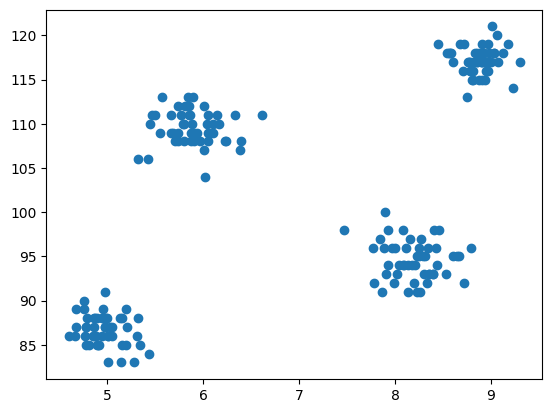

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [4]:
# elbow method to find number of clusters
from sklearn.cluster import KMeans

In [5]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [6]:
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 587.7764274703555,
 395.9605877691833,
 328.7209018372581,
 289.9508880167451,
 262.22126768565766,
 176.33580076748322]

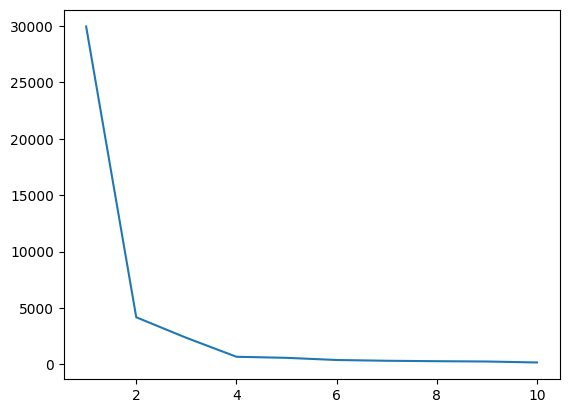

In [7]:
plt.plot(range(1,11),wcss)

In [8]:
X = df.iloc[:,:].values # forming numpy array
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [9]:
y_means

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3], dtype=int32)

In [10]:
X[y_means == 3,1]

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

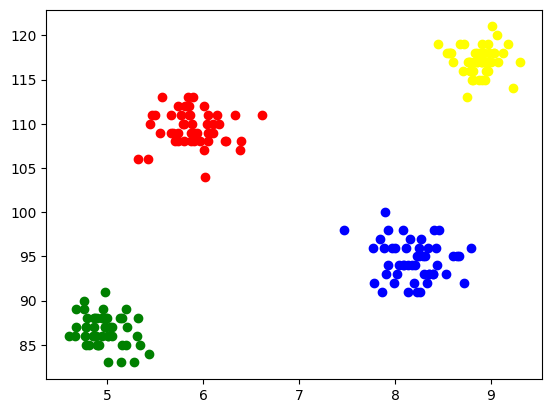

In [11]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue') # cluster 0 with value of 0 then cluster 0 with value of 1
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

### K means on 3D data

In [12]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [13]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [14]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [15]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

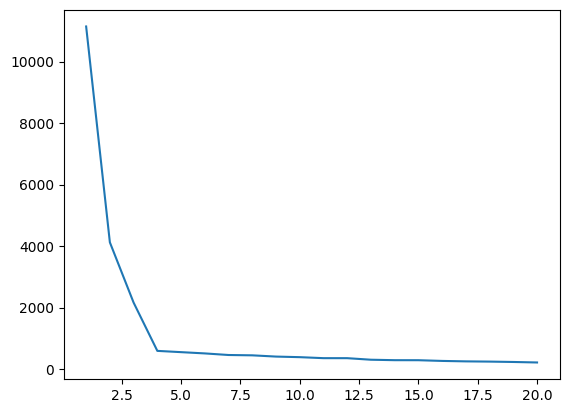

In [16]:
plt.plot(range(1,21),wcss)

In [17]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [18]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [19]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()